In [10]:
# Part 1: Data Preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Load the dataset from CSV file
df = pd.read_csv('heart.csv')

df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Dataset Description:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  13

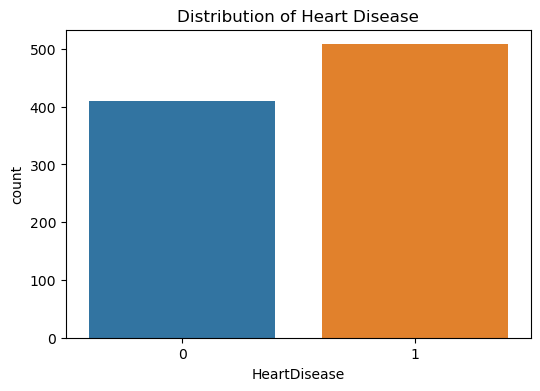

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


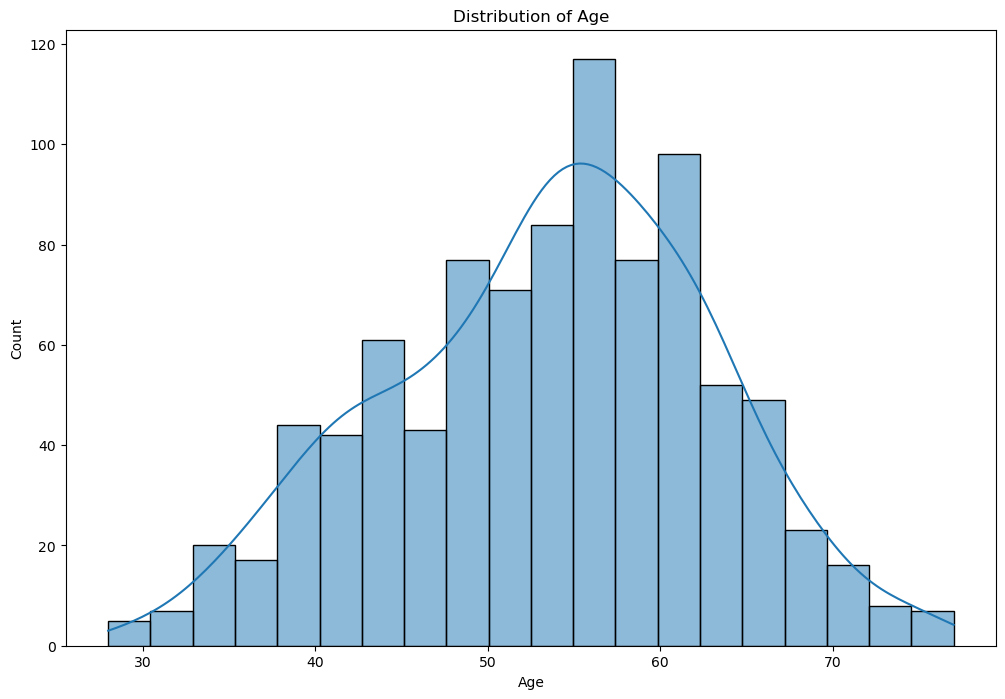

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


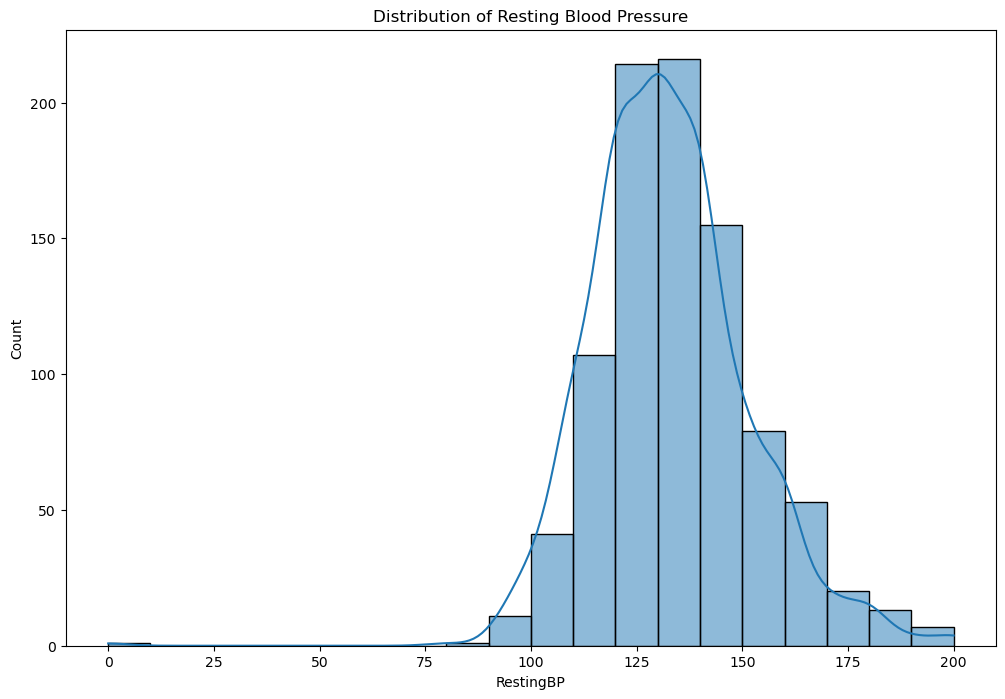

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


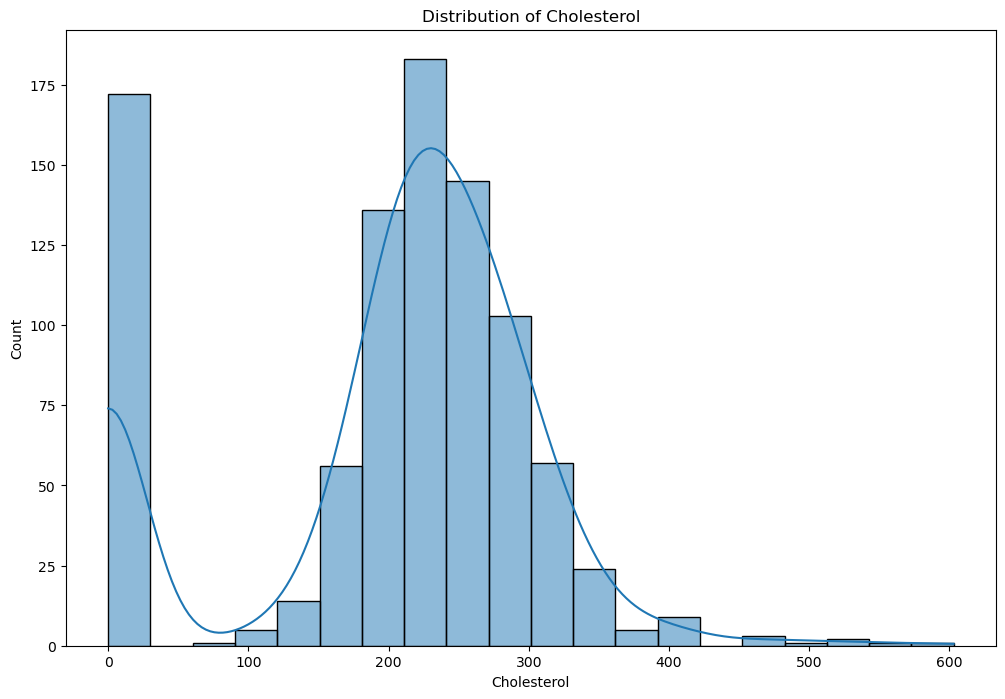

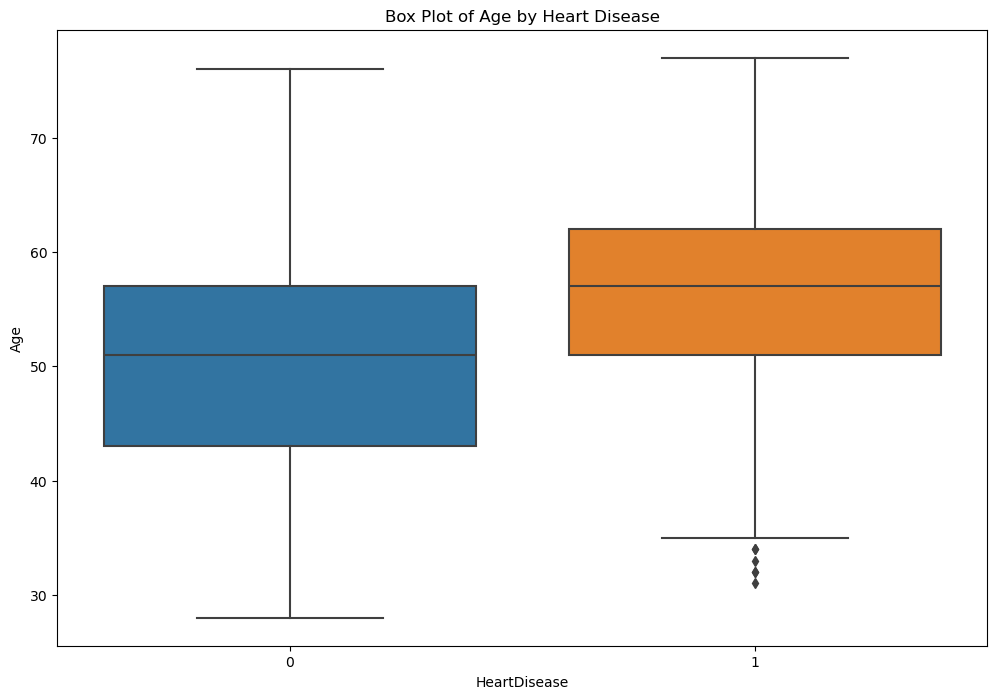

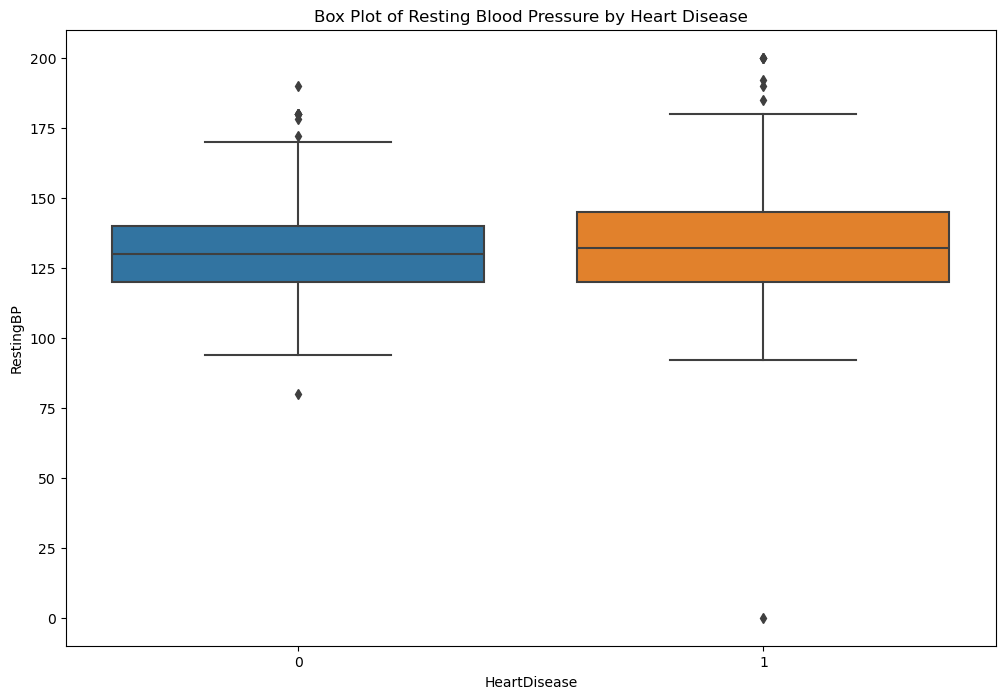

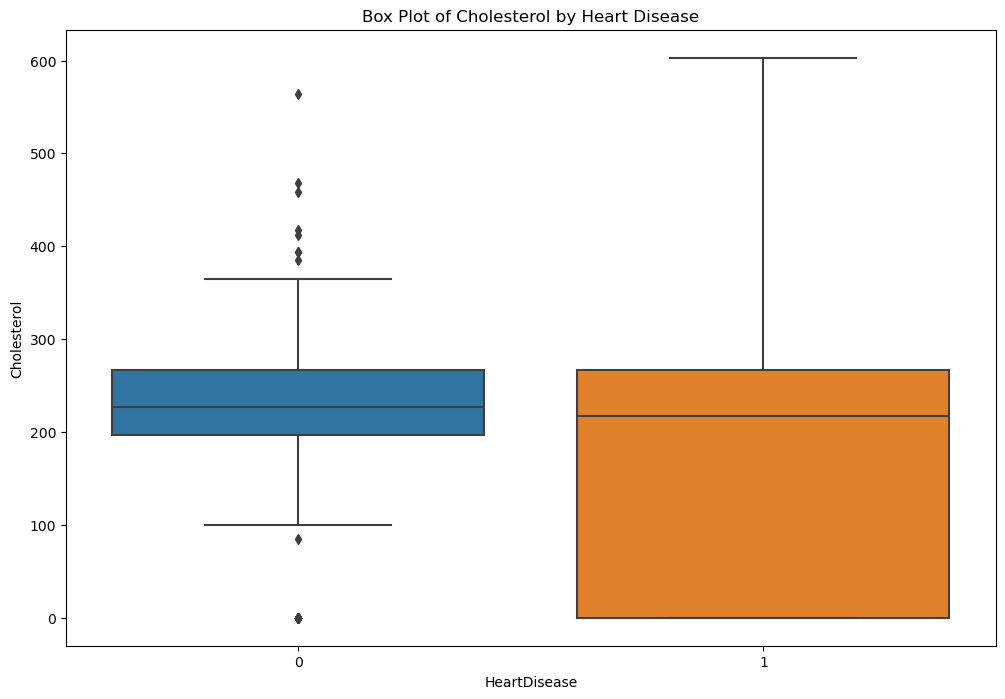

AttributeError: 'numpy.int64' object has no attribute 'startswith'

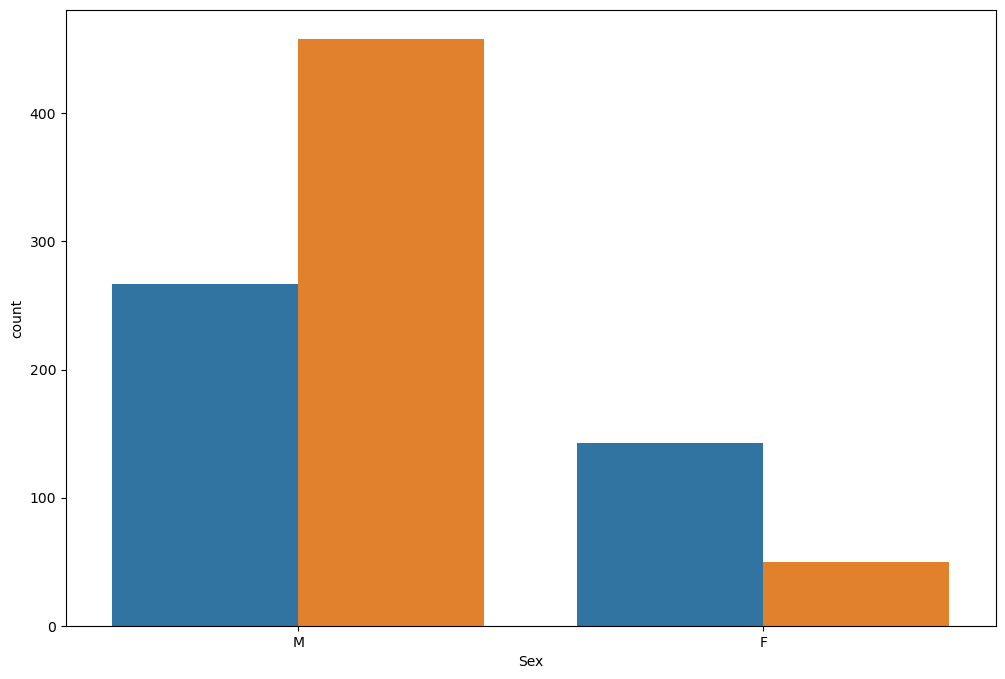

In [11]:
# Part 2: Exploratory Data Analysis 
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())


# EDA: Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease')
plt.show()

# EDA: Distribution of numerical features
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['RestingBP'], kde=True, bins=20)
plt.title('Distribution of Resting Blood Pressure')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['Cholesterol'], kde=True, bins=20)
plt.title('Distribution of Cholesterol')
plt.show()

# EDA: Box plots for numerical features by target variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Box Plot of Age by Heart Disease')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Box Plot of Resting Blood Pressure by Heart Disease')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Box Plot of Cholesterol by Heart Disease')
plt.show()

# EDA: Count plots for categorical features
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title('Count of Heart Disease by Sex')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
plt.title('Count of Heart Disease by Chest Pain Type')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='RestingECG', hue='HeartDisease')
plt.title('Count of Heart Disease by Resting ECG')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease')
plt.title('Count of Heart Disease by Exercise Angina')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')
plt.title('Count of Heart Disease by ST Slope')
plt.show()

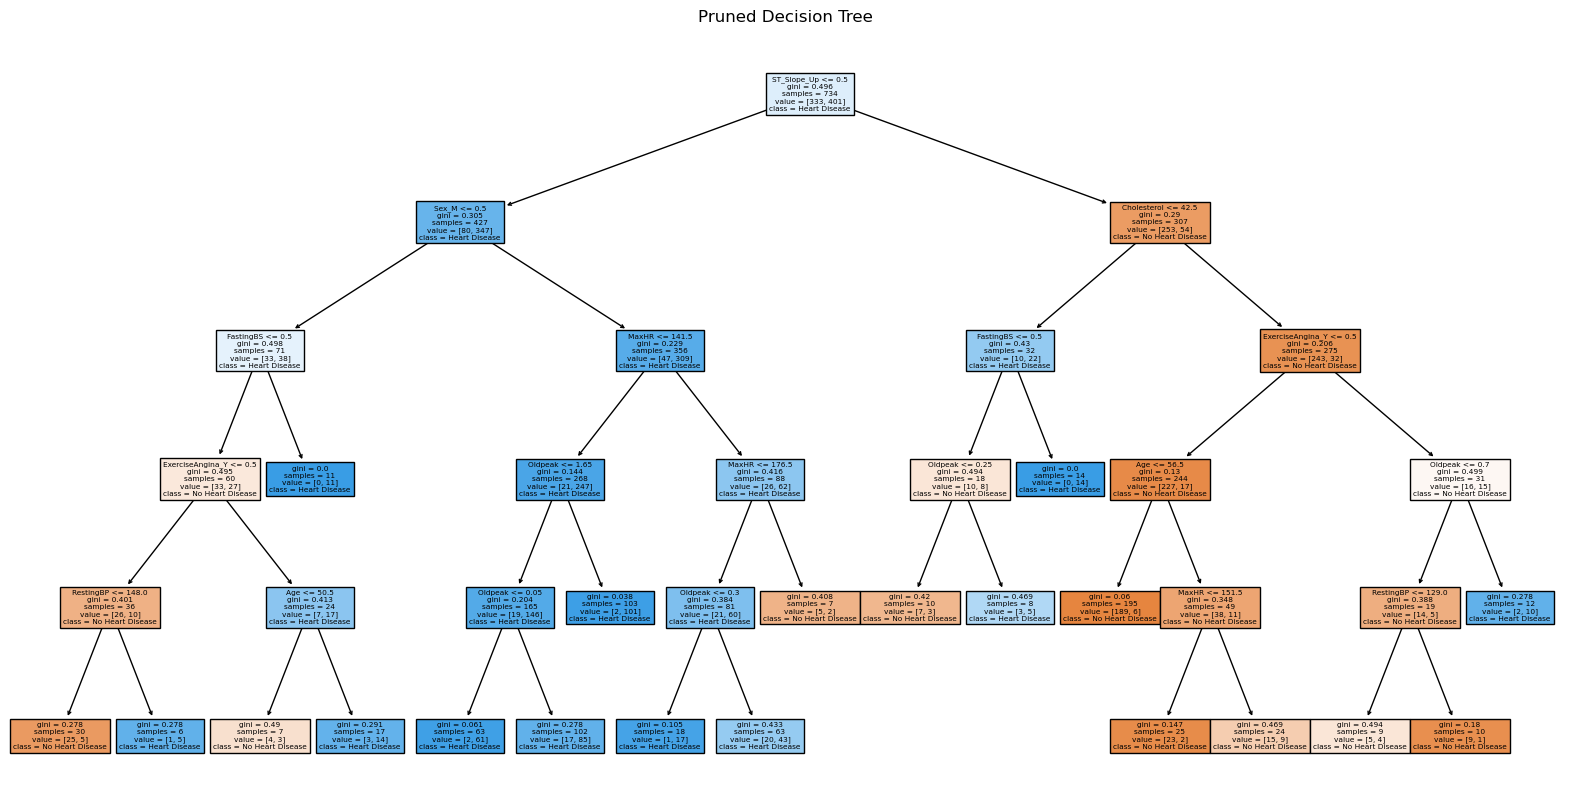

In [22]:
# Define the  features and target variable
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]               # Target variable

# Split the data, for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model, also prune the data-set
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,            # Limiting the maximum depth of the tree
    min_samples_split=10,   # Minimum samples required to split an internal node
    min_samples_leaf=5,     # Minimum samples required to be at a leaf node
    max_leaf_nodes=20       # Maximum number of leaf nodes in the tree
)
model.fit(X_train, y_train)

# Visualize the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.title('Pruned Decision Tree')
plt.show()


Accuracy: 0.89
Sensitivity: 0.89
Specificity: 0.88


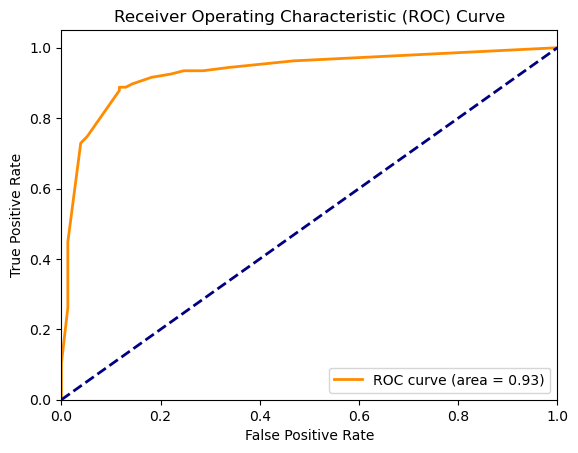

In [23]:

# Part 3: Evaluation
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculating accuracy, sensitivity, specificity
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Printing the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Part 4: Calculate Gini Index
def gini_index(y_true, y_prob):
    # Gini index based on ROC AUC
    return 2 * auc(fpr, tpr) - 1

# Calculate Gini index
gini = gini_index(y_test, y_prob)
print(f"Gini Index: {gini:.2f}")

Gini Index: 0.86
